In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data =  pd.read_csv('./Data/data.csv')
data

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,Vocational,A,Female,Very Interested,Rural,49,7420000,63.6,85.99,True,True
996,Academic,B,Female,Less Interested,Rural,51,7480000,84.3,89.72,True,True
997,Vocational,A,Male,Less Interested,Urban,49,5550000,75.2,79.56,False,True
998,Academic,B,Male,Uncertain,Rural,53,5840000,105.8,87.18,True,True


In [3]:
data.isna().sum()

type_school              0
school_accreditation     0
gender                   0
interest                 0
residence                0
parent_age               0
parent_salary            0
house_area               0
average_grades           0
parent_was_in_college    0
will_go_to_college       0
dtype: int64

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
parent_age,1000.0,5.220800e+01,3.500427e+00,40.0,5.000000e+01,52.000,5.400000e+01,65.0
parent_salary,1000.0,5.381570e+06,1.397546e+06,1000000.0,4.360000e+06,5440000.000,6.382500e+06,10000000.0
house_area,1000.0,7.451530e+01,1.529335e+01,20.0,6.460000e+01,75.500,8.482500e+01,120.0
average_grades,1000.0,8.609720e+01,3.378738e+00,75.0,8.373750e+01,85.575,8.826250e+01,98.0


In [5]:
data['type_school'].value_counts()

Academic      609
Vocational    391
Name: type_school, dtype: int64

In [6]:
data['school_accreditation'].value_counts()

B    519
A    481
Name: school_accreditation, dtype: int64

In [7]:
data['interest'].unique()

array(['Less Interested', 'Very Interested', 'Uncertain',
       'Not Interested', 'Interested'], dtype=object)

In [8]:
data['residence'].value_counts()

Urban    539
Rural    461
Name: residence, dtype: int64

In [9]:
def change_gender_to_is_woman(df):
    df['is_woman'] = df['gender'].map({'Male': 0, 'Female': 1})
    df = df.drop('gender',axis=1)
    
    return df

In [10]:
def scale_to_number_intrest(df):
    df['interest'] = df['interest'].map({'Not Interested': 0, 'Less Interested': 1, 'Uncertain': 2, 'Interested': 3, 'Very Interested': 4})
    
    return df

In [11]:
def change_type_school_to_is_academic(df):
    df['is_academic'] = df['type_school'].map({'Vocational': 0, 'Academic': 1})
    df = df.drop('type_school',axis=1)
    
    return df

In [12]:
def change_residence_to_is_urban(df):
    df['is_urban'] = df['residence'].map({'Rural': 0, 'Urban': 1})
    df = df.drop('residence',axis=1)
    
    return df

In [13]:
def school_accreditation_to_is_A(df):
    df['is_A'] = df['school_accreditation'].map({'B':0, 'A':1})
    df = df.drop('school_accreditation',axis=1)
    
    return df

In [14]:
def bool_to_binary(df, column_to_change):
    df[column_to_change]= df[column_to_change].map({False: 0, True: 1})
    
    return df

In [15]:
data = change_gender_to_is_woman(data)
data = scale_to_number_intrest(data)
data = change_type_school_to_is_academic(data)
data = change_residence_to_is_urban(data)
data = school_accreditation_to_is_A(data)

In [16]:
data = bool_to_binary(data, 'parent_was_in_college')
data = bool_to_binary(data, 'will_go_to_college')
data

,interest,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college,is_woman,is_academic,is_urban,is_A
0,1,56,6950000,83.0,84.09,0,1,0,1,1,1
1,1,57,4410000,76.8,86.91,0,1,0,1,1,1
2,4,50,6500000,80.6,87.43,0,1,1,1,1,0
3,4,49,6600000,78.2,82.12,1,1,0,0,0,0
4,4,57,5250000,75.1,86.79,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
995,4,49,7420000,63.6,85.99,1,1,1,0,0,1
996,1,51,7480000,84.3,89.72,1,1,1,1,0,0
997,1,49,5550000,75.2,79.56,0,1,0,0,1,1
998,2,53,5840000,105.8,87.18,1,1,0,1,0,0


In [17]:
min_max_scaler = MinMaxScaler()

In [18]:
column_to_min_max_scaler = ['parent_age','parent_salary','house_area','average_grades']
data[column_to_min_max_scaler] = min_max_scaler.fit_transform(data[column_to_min_max_scaler])
data

,interest,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college,is_woman,is_academic,is_urban,is_A
0,1,0.64,0.661111,0.630,0.395217,0,1,0,1,1,1
1,1,0.68,0.378889,0.568,0.517826,0,1,0,1,1,1
2,4,0.40,0.611111,0.606,0.540435,0,1,1,1,1,0
3,4,0.36,0.622222,0.582,0.309565,1,1,0,0,0,0
4,4,0.68,0.472222,0.551,0.512609,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
995,4,0.36,0.713333,0.436,0.477826,1,1,1,0,0,1
996,1,0.44,0.720000,0.643,0.640000,1,1,1,1,0,0
997,1,0.36,0.505556,0.552,0.198261,0,1,0,0,1,1
998,2,0.52,0.537778,0.858,0.529565,1,1,0,1,0,0


In [19]:
data.columns

Index(['interest', 'parent_age', 'parent_salary', 'house_area',
       'average_grades', 'parent_was_in_college', 'will_go_to_college',
       'is_woman', 'is_academic', 'is_urban', 'is_A'],
      dtype='object')

In [20]:
column_sort_order = ['is_academic', 'is_urban','is_woman', 'parent_age', 'interest', 'parent_age', 
                     'parent_salary', 'house_area','average_grades', 'parent_was_in_college', 
                     'is_academic', 'is_urban', 'is_A', 'will_go_to_college']

In [21]:
data= data[column_sort_order]

<AxesSubplot:>

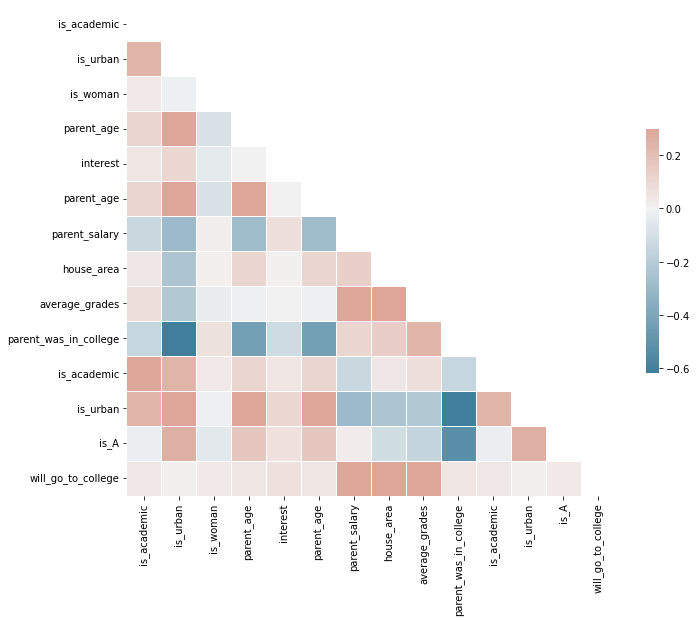

In [22]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [47]:
data.to_csv('./Data/academic_data.csv',index=False)